# Part 1: Research Question

## A: What variables are most important regarding if a customer will churn or not?

## B: Variables in the Data Set:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

# Raw Data to DataFrame
df = pd.read_csv('churn_raw_data.csv', encoding='utf-8', index_col=0)

# Show Variables, Non-Null Count, and Data Type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education          

- **int64**
: Integer numbers
- **float64**
: Floating point numbers
- **object**
: Text or mixed numeric and non-numberic values

[Link to Pandas datatype reference](https://pbpython.com/pandas_dtypes.html)

### Variables with Context
**CaseOrder**: Integer index that preserves the original order of each row in the data\
**Customer_id**: Text string that identifies a unqiue customer\
**Interaction**: Text string UUID (universally unique identifier) identifying the interaction with the customer\
**City**: Text string of the city on the customer's billing statement\
**State**: Text string of the two letter abbrivation of state on the customer's billing statement\
**County**: Text string of the county name on the customer's billing statement\
**Zip**: Integer number of the zip code on the customer's billing statement\
**Lat**: Floating point numerical value of the customer's Latitude\
**Lng**: Floating point numerical value of the customer's Longitude\
**Population**: Integer number of the population within a mile radius\
**Area**: Text string of the Area category based on census data\

In [2]:
print(df['Area'].unique())

['Urban' 'Suburban' 'Rural']


**Timezone**: Text string of the Timezone category the customer's located in

In [3]:
print(df['Timezone'].unique())

['America/Sitka' 'America/Detroit' 'America/Los_Angeles' 'America/Chicago'
 'America/New_York' 'America/Puerto_Rico' 'America/Denver'
 'America/Menominee' 'America/Phoenix' 'America/Indiana/Indianapolis'
 'America/Boise' 'America/Kentucky/Louisville' 'Pacific/Honolulu'
 'America/Indiana/Petersburg' 'America/Nome' 'America/Anchorage'
 'America/Indiana/Knox' 'America/Juneau' 'America/Toronto'
 'America/Indiana/Winamac' 'America/Indiana/Vincennes'
 'America/North_Dakota/New_Salem' 'America/Indiana/Tell_City'
 'America/Indiana/Marengo' 'America/Ojinaga']


**Job**: Text string of the customer's job title\
**Children**: Integer number of the amount of children as reported in sign-up info\
**Age**: Integar number of the customer's age\
**Education**: Text string of the Education level the customer has completed\

In [4]:
print(df['Education'].unique())

["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']


**Employment**: Text string of the customer's employment status

In [5]:
print(df['Employment'].unique())

['Part Time' 'Retired' 'Student' 'Full Time' 'Unemployed']


**Income**: Floating point numerical value of the customer's annual income\
**Marital**: Text string of the marital status of the customer\

In [6]:
print(df['Marital'].unique())

['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced']


**Gender**: Text string of the customer's gender

In [7]:
print(df['Gender'].unique())

['Male' 'Female' 'Prefer not to answer']


**Churn**: Text string [Yes, No] of if the customer has cancelled the provider's subscription within the last month

**Outage_sec_perweek**: Floating point number of the amount of seconds per week the customer has experienced an outage\
**Email**: Integer number of how many emails the customer has received in the last year\
**Contacts**: Integer number of the number of times the customer has contacted technical support\
**Yearly_equip_failure**: Integer number of the number of times the customer's equipment was reported to fail\
**Techie**: Text string [Yes, No] that indicates if the customer considers themselves as technologically inclined\
**Contract**: Text string of the type of contract the customer has

In [8]:
print(df['Contract'].unique())

['One year' 'Month-to-month' 'Two Year']


**Port_modem**: Text string [Yes, No] that indicates if the customer has a portable modem\
**Tablet**: Text string [Yes, No] that indicates if the customer owns a Tablet\
**InternetService**: Text string of the type of internet service the customer has\

In [9]:
print(df['InternetService'].unique())

['Fiber Optic' 'DSL' 'None']


**Phone**: Text string [Yes, No] indicates if the customer had phone service\
**Multiple**: Text string [Yes, No] indicates if the customer had multiple phone lines\
**OnlineSecurity**: Text string [Yes, No] indicates if the customer had online security add-on\
**OnlineBackup**: Text string [Yes, No] indicates if the customer had the online backup add-on\
**DeviceProtection**: Text string [Yes, No] indicates if the customer had device protection add-on\
**TechSupport**: Text string [Yes, No] indicates if the customer had access to Tech Suppor add-ont\
**StreamingTV**: Text string [Yes, No] indicates if the customer had Streaming TV service\
**StreamingMovies**: Text string [Yes, No] indicates if the customer had Streaming movies service\
**PaperBilling**: Text string [Yes, No] indicates if the customer had paperless billing\
**PaymentMethod**: Text string of the type of payment method the customer used\

In [10]:
print(df['PaymentMethod'].unique())

['Credit Card (automatic)' 'Bank Transfer(automatic)' 'Mailed Check'
 'Electronic Check']


**Tenure**: Floating point number of the months the customer stayed with the provider\
**MonthlyCharge**: Floating point number of how much the customer was charged on a monthly basis\
**Bandwith_GB_Year**: Floating point number of the average amount of bandwidth a customer used in a year, reflected in an average per customer\
**item1**: Integer between 1-7 rating the level of importance of timely response\
**item2**: Integer between 1-7 rating the level of importance of timely fixes\
**item3**: Integer between 1-8 rating the level of importance of timely replacements\
**item4**: Integer between 1-7 rating the level of importance of reliability\
**item5**: Integer between 1-7 rating the level of importance of options\
**item6**: Integer between 1-8 rating the level of importance of respectful response\
**item7**: Integer between 1-7 rating the level of importance of courteous exchange\
**item8**: Integer between 1-8 rating the level of importance of evidence of active listening\

In [11]:
for column in df:
    if 'item' in column:
        print(column + " " + str(sorted(df[column].unique())))

item1 [1, 2, 3, 4, 5, 6, 7]
item2 [1, 2, 3, 4, 5, 6, 7]
item3 [1, 2, 3, 4, 5, 6, 7, 8]
item4 [1, 2, 3, 4, 5, 6, 7]
item5 [1, 2, 3, 4, 5, 6, 7]
item6 [1, 2, 3, 4, 5, 6, 7, 8]
item7 [1, 2, 3, 4, 5, 6, 7]
item8 [1, 2, 3, 4, 5, 6, 7, 8]


# Part 2: Data-Cleaning Plan

- I've used the programming language **Python** with the following libraries
    - **Pandas**, for converting the csv file into a dataframe and to make calculations on
    - **matpotlib.pyplot**, for plotting the data into various graphs

My plan for cleaning the data is to first rename the survey item columns to provide better context while working with the data. Next I will check for missing values (null data) and check for outliers in the data by using various graphs. Below is an outline of the process I will take:\ 
\
- Rename columns to provide more context when data mining
    - items 1-8 should clarify what survey question it contained
- Address variables that have missing data. If the variables are numerical and show a pattern of Missing at Random using graphing techniques, then I will apply the average the to the null data. For the fields with Text [Yes, No] variables I will replace the Null data with a new text string of 'Not Answered' to indicate the data from the sign up information was not answered or missing. If the variables are missing data in a pattern then the variable will be removed to avoid potentially bias conclusions. 
    - Numerical Variables with missing data:
        - Children
        - Age
        - Income
        - Tenure
        - Bandwidth_GB_Year
    - Yes/No Variables with missing data:
        - Techie
        - Phone
        - TechSupport
- Go through each variable that could have outliers and apply graphing techniques (Boxplots or Histograms) to find the outliers in the data and remove or standardize the data if it's outside a particular threshold
    - Income
    - Population
    - Outage_sec_perweek
    - Tenure
    - MonthlyCharge
    - Bandwith_GB_Year
    - Contacts

## Part 3: Data Cleaning

### Renaming item columns to more closely match their survey question

In [12]:
# Renaming Survey Item columns
df = df.rename(columns={
    'item1': 'Survey_Timely_Response',
    'item2': 'Survey_Timely_Fixes',
    'item3': 'Survey_Timely_Replacements',
    'item4': 'Survey_Reliability',
    'item5': 'Survey_Options',
    'item6': 'Survey_Respectful_Response',
    'item7': 'Survey_Courteous_Exchange',
    'item8': 'Survey_Active_Listening'
})
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,Survey_Timely_Response,Survey_Timely_Fixes,Survey_Timely_Replacements,Survey_Reliability,Survey_Options,Survey_Respectful_Response,Survey_Courteous_Exchange,Survey_Active_Listening
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


### Comparing Churn data for rows with null Children data against rows with Children data

Text(0.5, 1.0, 'Churn Data with missing Children')

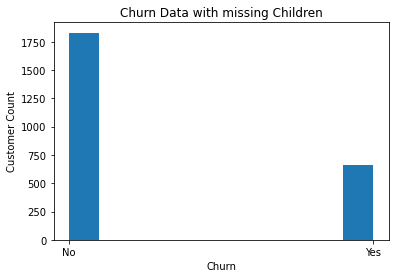

In [13]:
# All rows with null children
df_null_children = df[df['Children'].isnull()]
# All rows with children
df_not_null_children = df[df['Children'].notnull()]

# Histogram showing churn for all rows with null Children
plt.hist(df_null_children['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data with missing Children')

Text(0.5, 1.0, 'Churn Data for Customers with Children')

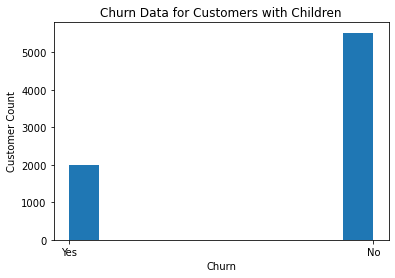

In [14]:
# Histogram showing churn for all rows with children
plt.hist(df_not_null_children['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data for Customers with Children')

**The above histograms show that the ratio of Customer Churn is appears the same regardless if Children are null or not null**\
Now I will fill the null values with the avgerage number of children per customer

In [15]:
# Fills the null values for children with the average number of children per customer
df['Children'].fillna(int((df['Children'].mean())), inplace=True)

### Comparing Churn data for rows with null Age data against rows with Age data

Text(0.5, 1.0, 'Churn Data with missing Age')

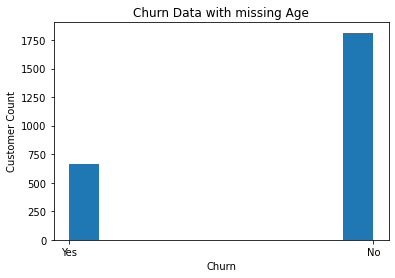

In [16]:
# All rows with null ages
df_null_age = df[df['Age'].isnull()]
# All rows with ages
df_not_null_age = df[df['Age'].notnull()]

# Histogram showing churn for all rows with null Ages
plt.hist(df_null_age['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data with missing Age')

Text(0.5, 1.0, 'Churn Data for Customers with Ages')

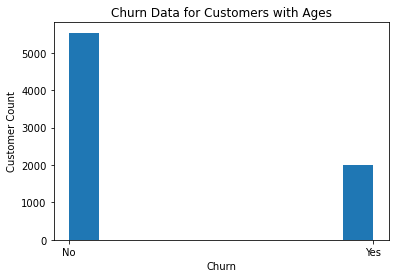

In [17]:
# Histogram showing churn for all rows with ages
plt.hist(df_not_null_age['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data for Customers with Ages')

**The above histograms show that the ratio of Customer Churn is appears the same regardless if Age is null or not null**\
Now I will fill the null values with the avgerage age per customer

In [18]:
# Fills the null values for children with the average age per customer
df['Age'].fillna(int((df['Age'].mean())), inplace=True)

### Comparing Churn data for rows with null Income data against rows with Income data

Text(0.5, 1.0, 'Churn Data with missing Income')

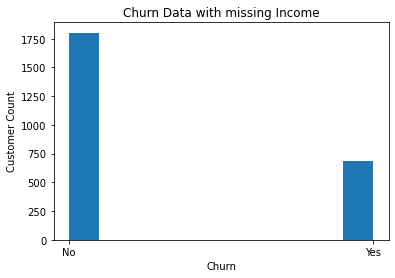

In [19]:
# All rows with null income
df_null_income = df[df['Income'].isnull()]
# All rows with income
df_not_null_income = df[df['Income'].notnull()]

# Histogram showing churn for all rows with null Income
plt.hist(df_null_income['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data with missing Income')

Text(0.5, 1.0, 'Churn Data for Customers with Income')

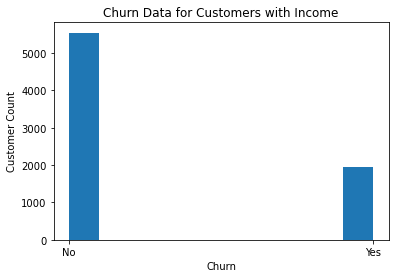

In [20]:
# Histogram showing churn for all rows with ages
plt.hist(df_not_null_income['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data for Customers with Income')

**The above histograms show that the ratio of Customer Churn is appears the same regardless if Income is null or not null**\
Now I will fill the null values with the avgerage income per customer

In [21]:
# Fills the null values for children with the average income per customer
df['Income'].fillna((df['Income'].mean()), inplace=True)

### Comparing Churn data for rows with null Tenure data against rows with Tenure data

Text(0.5, 1.0, 'Churn Data with missing Tenure')

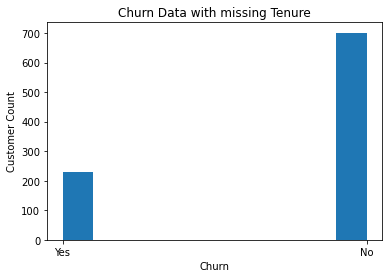

In [22]:
# All rows with null Tenure
df_null_tenure = df[df['Tenure'].isnull()]
# All rows with Tenure
df_not_null_tenure = df[df['Tenure'].notnull()]

# Histogram showing churn for all rows with null Tenure
plt.hist(df_null_tenure['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data with missing Tenure')

Text(0.5, 1.0, 'Churn Data for Customers with Tenure')

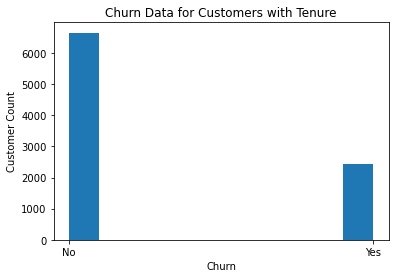

In [23]:
# Histogram showing churn for all rows with Tenure
plt.hist(df_not_null_tenure['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data for Customers with Tenure')

**The above histograms show that the ratio of Customer Churn is appears the same regardless if Tenure is null or not null**\
Now I will fill the null values with the avgerage tenure per customer

In [24]:
# Fills the null values for children with the average tenure per customer
df['Tenure'].fillna((df['Tenure'].mean()), inplace=True)

### Comparing Churn data for rows with null Bandwidth_GB_Year data against rows with Bandwidth_GB_Year data

Text(0.5, 1.0, 'Churn Data with missing Bandwith')

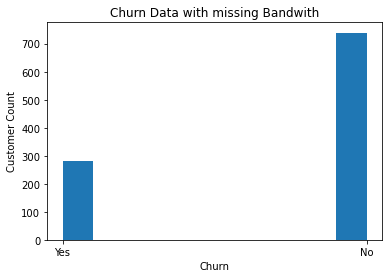

In [25]:
# All rows with null Bandwidth
df_null_bandwith = df[df['Bandwidth_GB_Year'].isnull()]
# All rows with Bandwidth
df_not_null_bandwith = df[df['Bandwidth_GB_Year'].notnull()]

# Histogram showing churn for all rows with null Bandwidth
plt.hist(df_null_bandwith['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data with missing Bandwith')

Text(0.5, 1.0, 'Churn Data for Customers with Bandwith')

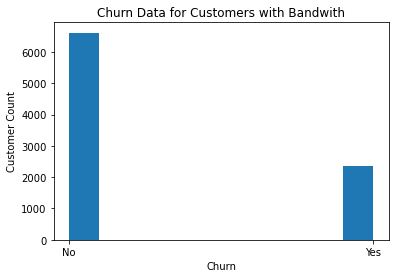

In [26]:
# Histogram showing churn for all rows with Bandwidth
plt.hist(df_not_null_bandwith['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data for Customers with Bandwith')

**The above histograms show that the ratio of Customer Churn is appears the same regardless if Bandwidth_GB_Year is null or not null**\
Now I will fill the null values with the avgerage Bandwidth_GB_Year per customer

In [27]:
# Fills the null values for children with the average Bandwidth_GB_Year per customer
df['Bandwidth_GB_Year'].fillna((df['Bandwidth_GB_Year'].mean()), inplace=True)

### The columns Techie, Phone, TechSupport all have missing data but are Text fields with either 'Yes' or 'No
I will do similar checks on this data to make sure they appear to be null at random and if so replace the Null data with a new text string "Not Answered" to clarify that the customer did not give a Yes or No answer. Otherwise if the missing data is in a patter I'll remove the rows with Null data to prevent bias analysis.

### Comparing Churn data for rows with null Techie data against rows with Techie data

Text(0.5, 1.0, 'Churn Data with missing Techie data')

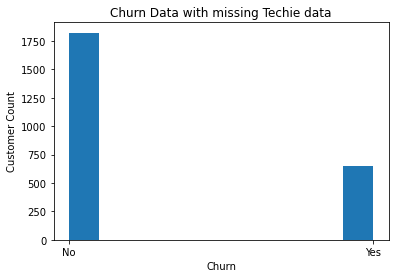

In [28]:
# All rows with null Techie data
df_null_techie = df[df['Techie'].isnull()]
# All rows with Techie Data
df_not_null_techie = df[df['Techie'].notnull()]

# Histogram showing churn for all rows with null Techie data
plt.hist(df_null_techie['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data with missing Techie data')

Text(0.5, 1.0, 'Churn Data for Customers with Techie data')

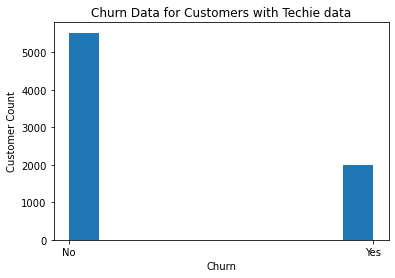

In [29]:
# Histogram showing churn for all rows with Techie data
plt.hist(df_not_null_techie['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data for Customers with Techie data')

**The above histograms show that the ratio of Customer Churn is appears the same regardless if Techie data is null or not null**\
Now I will fill the null values with the text string "Not Answered"

In [30]:
# Fills the null values for Techie data with the text string "Not Answered"
df['Techie'].fillna(('Not Answered'), inplace=True)

### Comparing Churn data for rows with null Phone data against rows with Phone data

Text(0.5, 1.0, 'Churn Data with missing Phone data')

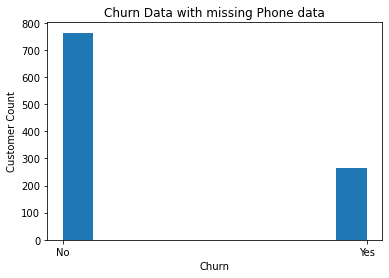

In [31]:
# All rows with null Phone data
df_null_phone = df[df['Phone'].isnull()]
# All rows with Phone Data
df_not_null_phone = df[df['Phone'].notnull()]

# Histogram showing churn for all rows with null Phone data
plt.hist(df_null_phone['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data with missing Phone data')

Text(0.5, 1.0, 'Churn Data for Customers with Phone data')

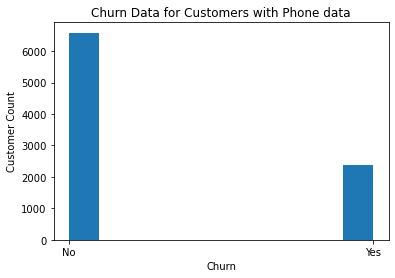

In [32]:
# Histogram showing churn for all rows with Phone data
plt.hist(df_not_null_phone['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data for Customers with Phone data')

**The above histograms show that the ratio of Customer Churn is appears the same regardless if Phone data is null or not null**\
Now I will fill the null values with the text string "Not Answered"

In [33]:
# Fills the null values for Phone data with the text string "Not Answered"
df['Phone'].fillna(('Not Answered'), inplace=True)

### Comparing Churn data for rows with null Phone data against rows with TechSupport data

Text(0.5, 1.0, 'Churn Data with missing TechSupport data')

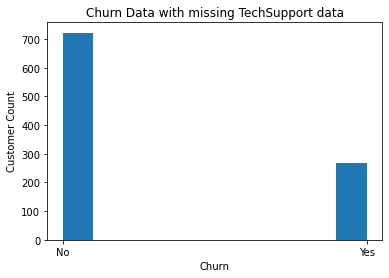

In [34]:
# All rows with null TechSupport data
df_null_tech_support = df[df['TechSupport'].isnull()]
# All rows with TechSupport Data
df_not_null_tech_support = df[df['TechSupport'].notnull()]

# Histogram showing churn for all rows with null TechSupport data
plt.hist(df_null_tech_support['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data with missing TechSupport data')

Text(0.5, 1.0, 'Churn Data for Customers with TechSupport data')

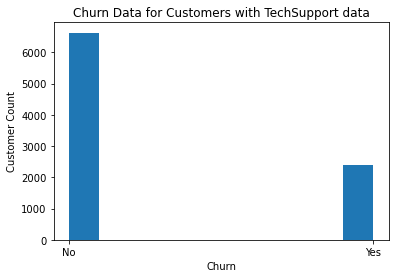

In [35]:
# Histogram showing churn for all rows with TechSupport data
plt.hist(df_not_null_tech_support['Churn'])
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Data for Customers with TechSupport data')

**The above histograms show that the ratio of Customer Churn is appears the same regardless if TechSupport data is null or not null**\
Now I will fill the null values with the text string "Not Answered"

In [36]:
# Fills the null values for TechSupport data with the text string "Not Answered"
df['TechSupport'].fillna(('Not Answered'), inplace=True)

**Now the dataset no longer has missing any data**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CaseOrder                   10000 non-null  int64  
 1   Customer_id                 10000 non-null  object 
 2   Interaction                 10000 non-null  object 
 3   City                        10000 non-null  object 
 4   State                       10000 non-null  object 
 5   County                      10000 non-null  object 
 6   Zip                         10000 non-null  int64  
 7   Lat                         10000 non-null  float64
 8   Lng                         10000 non-null  float64
 9   Population                  10000 non-null  int64  
 10  Area                        10000 non-null  object 
 11  Timezone                    10000 non-null  object 
 12  Job                         10000 non-null  object 
 13  Children                    100

### Finding Outliers in the data using Boxplots and Z-Scores

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8f8519910>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8f8519fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8f85195b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff8f85266d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8f8526a30>],
 'means': []}

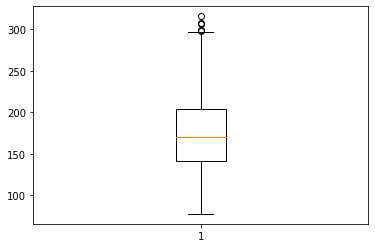

In [38]:
plt.boxplot(df['MonthlyCharge'])

In [39]:
## Grabs outliers using 1.5 IQR Rule
# https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

Q1 =  df['MonthlyCharge'].quantile(0.25)
Q3 = df['MonthlyCharge'].quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.

outlier_count = len(df[(df['MonthlyCharge'] < Q1-1.5*IQR ) | (df['MonthlyCharge'] > Q3+1.5*IQR)])
print('Outlier Count for MonthlyCharge: ' + str(outlier_count))

# Filters out the outliers and returns the dataframe with the outliers removed
df = df[(df['MonthlyCharge'] > Q1-1.5*IQR ) & (df['MonthlyCharge'] < Q3+1.5*IQR)]
print('New Total Count: ' + str(len(df)))

Outlier Count for MonthlyCharge: 5
New Total Count: 9995


There are 5 outliers detected here

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8f8705fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8f87136d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8f8705c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff8f8713d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8f8721130>],
 'means': []}

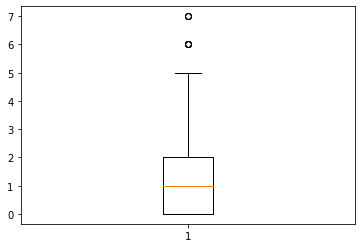

In [40]:
plt.boxplot(df['Contacts'])

In [41]:
## Grabs outliers using 1.5 IQR Rule
# https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

Q1 =  df['Contacts'].quantile(0.25)
Q3 = df['Contacts'].quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.

outlier_count = len(df[(df['Contacts'] < Q1-1.5*IQR ) | (df['Contacts'] > Q3+1.5*IQR)])
print('Outlier Count for Contacts: ' + str(outlier_count))

# Filters out the outliers and returns the dataframe with the outliers removed
df = df[(df['Contacts'] > Q1-1.5*IQR ) & (df['Contacts'] < Q3+1.5*IQR)]
print('New Total Count: ' + str(len(df)))

Outlier Count for Contacts: 8
New Total Count: 9967


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8f85f5190>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8f85f5850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8f85e6df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff8f85f5f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8f8cb22b0>],
 'means': []}

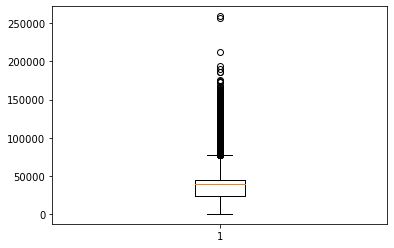

In [42]:
plt.boxplot(df['Income'])

In [43]:
## Grabs outliers using 1.5 IQR Rule
# https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

Q1 =  df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.

outlier_count = len(df[(df['Income'] < Q1-1.5*IQR ) | (df['Income'] > Q3+1.5*IQR)])
print('Outlier Count for Income: ' + str(outlier_count))

Outlier Count for Income: 768


By using just the Boxplot graph we get a total 768, which seems like a lot compared to the total dataset and as seen in the graph. Instead let's try finding the outliers by standardizing the Income variable and count the number of outliers with a score higher than 3 and lower than -3

In [51]:
df['income_z'] = stats.zscore(df['Income'])
zscore_outlier_count = len(df.query('income_z > 3 | income_z < -3'))
print('Outlier Count for Income using ZScore: ' + str(zscore_outlier_count))

Outlier Count for Income using ZScore: 179


Now the outlier count for Income is much more realistic and standardized. I'll now remove the outliers.

In [54]:
# Filters out all rows where the standardized income value isn't between 3 and -3
df = df.query('income_z < 3 & income_z > -3')
print('New Total Count: ' + str(len(df)))

New Total Count: 9788


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8f9130ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8f913d3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8f9130940>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff8f913da60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8f913ddc0>],
 'means': []}

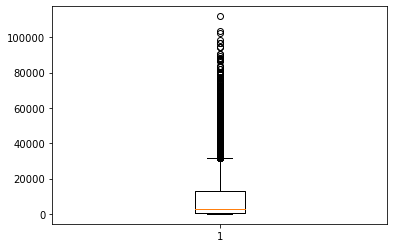

In [45]:
plt.boxplot(df['Population'])

In [46]:
## Grabs outliers using 1.5 IQR Rule
# https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

Q1 =  df['Population'].quantile(0.25)
Q3 = df['Population'].quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.

outlier_count = len(df[(df['Population'] < Q1-1.5*IQR ) | (df['Population'] > Q3+1.5*IQR)])
print('Outlier Count for Population: ' + str(outlier_count))

Outlier Count for Population: 933


The count is too high from just using Boxplot for the population varible. Going to attempt to standardize the variable and remove outliers outside of 3 and -3

In [57]:
df['population_z'] = stats.zscore(df['Population'])
zscore_outlier_count = len(df.query('population_z > 3 | population_z < -3'))
print('Outlier Count for Population using ZScore: ' + str(zscore_outlier_count))

# Filters out all rows where the standardized income value isn't between 3 and -3
df = df.query('population_z < 3 & population_z > -3')
print('New Total Count: ' + str(len(df)))

Outlier Count for Population using ZScore: 216
New Total Count: 9572


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8f92c2460>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8f92c2b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8f92c2100>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff8f92cd220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8f92cd580>],
 'means': []}

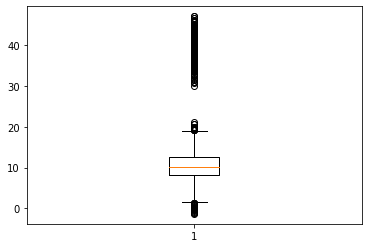

In [47]:
plt.boxplot(df['Outage_sec_perweek'])

In [48]:
## Grabs outliers using 1.5 IQR Rule
# https://www.geeksforgeeks.org/finding-the-outlier-points-from-matplotlib/

Q1 =  df['Outage_sec_perweek'].quantile(0.25)
Q3 = df['Outage_sec_perweek'].quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.

outlier_count = len(df[(df['Outage_sec_perweek'] < Q1-1.5*IQR ) | (df['Outage_sec_perweek'] > Q3+1.5*IQR)])
print('Outlier Count for Outage_sec_perweek: ' + str(outlier_count))

# Filters out the outliers and returns the dataframe with the outliers removed
# df = df[(df['Contacts'] > Q1-1.5*IQR ) & (df['Contacts'] < Q3+1.5*IQR)]
# print('New Total Count: ' + str(len(df)))

Outlier Count for Outage_sec_perweek: 534


The count is too high from just using Boxplot for the Outage_sec_perweek varible. Going to attempt to standardize the variable and remove outliers outside of 3 and -3

In [60]:
df['Outage_sec_perweek_z'] = stats.zscore(df['Outage_sec_perweek'])
zscore_outlier_count = len(df.query('Outage_sec_perweek_z > 3 | Outage_sec_perweek_z < -3'))
print('Outlier Count for Outage_sec_perweek using ZScore: ' + str(zscore_outlier_count))

# Filters out all rows where the standardized income value isn't between 3 and -3
df = df.query('Outage_sec_perweek_z < 3 & Outage_sec_perweek_z > -3')
print('New Total Count: ' + str(len(df)))

Outlier Count for Outage_sec_perweek using ZScore: 29
New Total Count: 8906


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8f91150d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8f9122580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8f85cddf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff8f8cbbbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8f82beac0>],
 'means': []}

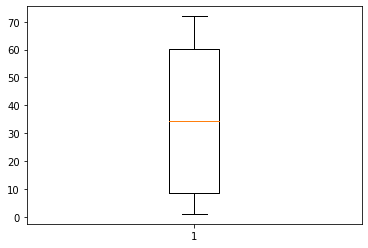

In [61]:
plt.boxplot(df['Tenure'])

No outliers found in **Tenure**, no action taken

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff8f948b610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff8f948bcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff8f948b2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff8f94963d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff8f9496730>],
 'means': []}

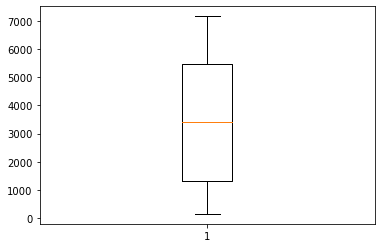

In [50]:
plt.boxplot(df['Bandwidth_GB_Year'])

No outliers found in **Bandwidth_GB_Year**, no action taken

## Applying Principal Component Analysis (PCA) to identify the significant features of the data

### 1.  List the principal components in the data set.

### 2.  Describe how you identified the principal components of the data set.

### 3.  Describe how the organization can benefit from the results of the PCA